# &#x1F4DD; REPORT

## ${\color{Salmon}1}$  Receiver for NR Primary Synchronization Signals (PSS)

### ${\color{Salmon}1.1}$ PSS signals

We are concerned with complex baseband equivalent transmit signals of the form
$$\tilde{S}_{PSS,i}(n) = \sum_k x_i(n − kN), i = 0, 1, 2 \qquad \qquad (1) $$ 
where $N$ is the periodicity of the PSS signals which is $10^{−2} \mathit{f_s}$ samples and $\mathit{f_s}$ is the sampling frequency. The PSS is part of a more complex signal called the SSB (Synchronization Signal Block) and there can be more than one in a period of 5ms depending on the antenna configuration, but here we will assume a simple scenario with a single SSB and therefore a single PSS as described in (1). $i$ is the index of the transmitted PSS signal and can have one of three values. In the context of this lab session, we will assume that the receiver uses a sampling frequency of $\mathit{f_s} = 61.44 × 10^6 samples/s$. $x_i(n)$ is the PSS signal itself which is of duration $N_{PSS} = 2048 + 144 = 2192$ samples. We will see later (after completing this lab session) that $2048$ is the OFDM symbol size in samples and $144$ is the cyclic prefix length.

#### ${\color{Salmon}1.1.1}$ Questions

##### $\color{Salmon}1.$ Using the supplied MATLAB file (pss.m) plot the real, imaginary components and magnitude of the one of the PSS signals. What do you see?

In [1]:
using Plots
using FFTW
using LinearAlgebra

&#x1F4D1; Note: the `Julia` files translating the `MATLAB` files are located under the `../data/julia` directory. The `Julia` files are just converting the `im` imaginary `MATLAB`'s keyword to a `j` imaginary keyword in `Julia`. 

Below a Julia source code example: 

```julia
# utility tools
# convert imaginary component from Matlab to Julia
j = im
include("../matlab/pss0.m")
```

The original `MATLAB` files are located under the `../matlab` folder and have `NOT` been modified nor altered. 

In [2]:
include("../data/julia/pss0.jl");

&#x1F4D1; Note: the `operations.jl` source code helps writting mathematical symbols:
For example:
- `Fᴵ` replaces the `ifft` function (inverse Fourier Transform)
- the convolution sign `⊗` is used rather than the `conv` function
- the reverse sign `⦰` is also used to replace the `reverse` function
- the concatenation sign `⧺` is used to make a vertical concatenation operation
- the transpose function `(.)ᵀ` is use to transpose a vector or a matrix 

In [3]:
include("../modules/operations.jl");

&#x1F4D1; Note: Greek letters are also used wherever it makes sense

- along with the greek laters LaTeX notations are extensively incorporated
- this with the hope to better correlate the Mathematical symbols and notations used in different documents

In [4]:
using LaTeXStrings

&#x1F4D1; Note: Plotting raw data received from the MATLAB files

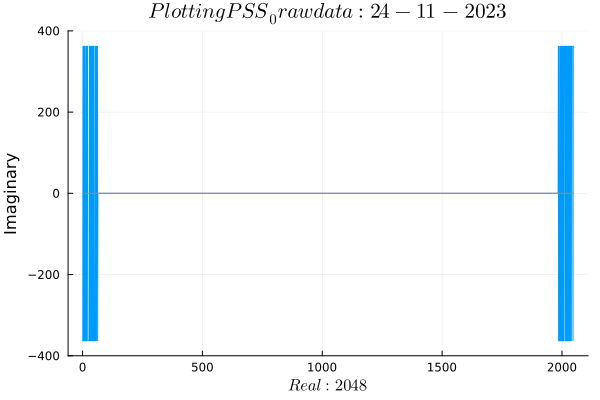

In [5]:
# Plot the result
date = "24-11-2023"

# pss2_real_plot = 
plot(real(pss_0)
    , xlabel="Real"
    , ylabel="Imaginary"
    , title=latexstring("Plotting PSS_0  raw data: ", date)
    , label="I"
    , legend=:topright
    , ylim=(-400, 400)
)
# savefig(pss2_real_plot,"images/pss2_real_plot.png");

plot!(imag(pss_0)
    , legend = :false
    , xlabel = latexstring("Real: ", length(pss_0))
    , label="Q"
)

In [6]:
𝑓ₛ = 61.44 * 1e6; @show 𝑓ₛ # samples/s
𝑁τ = 𝑓ₛ * 1e-2; @show 𝑁τ; # Periodicity 
𝐶ₚ = 144; # Cyclic Prefix
𝑁ₚₛₛ = length(pss_0) + 𝐶ₚ; @show 𝑁ₚₛₛ;

𝑓ₛ = 6.144e7
𝑁τ = 614400.0
𝑁ₚₛₛ = 2192


In [7]:
## convert the pss_0 signal in time domain
## 𝑆ₚₛₛ is the synchronization signal sequence
xₚₛₛ⁰ = pss_0; @show xₚₛₛ⁰[end] # File Handle
xₚₛₛ⁰ = Fᴵ(xₚₛₛ⁰); # S Slanted (fourier transform) in time domain
xₚₛₛ⁰ ./= norm(xₚₛₛ⁰); # Normalize the arrays
xₚₛₛ⁰ = xₚₛₛ⁰[(end-143):end] ⧺ xₚₛₛ⁰ ; @show size(xₚₛₛ⁰); # :end is 2048 in this case, concat math 

xₚₛₛ⁰[end] = 362 + 0im
size(xₚₛₛ⁰) = (2192,)


##### $\color{Salmon}1.$ Using the supplied MATLAB file (pss.m) plot the real, imaginary components and magnitude of the one of the PSS signals. What do you see?

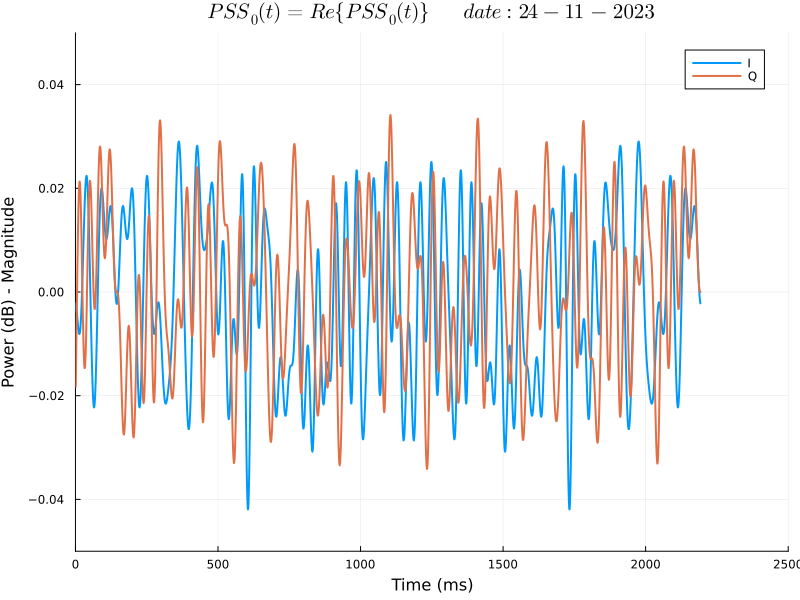

In [8]:
# Plot real part
plot(real(xₚₛₛ⁰)
    , xlabel="Time (ms)"
    , ylabel="Power (dB) - Magnitude"
    , title=latexstring("PSS_0(t) = {Re}\\{PSS_0(t)\\} \\qquad date:", date)
    , label="I"
    , legend=:topright
    , ylims = (-0.05, 0.05)
    , xlims = (0,2500)
    , linewidth = 2
)

# Plot imaginary part
plot!(imag(xₚₛₛ⁰)
    , label="Q"
    , linewidth = 2
    , size = ( 800, 600 )
)

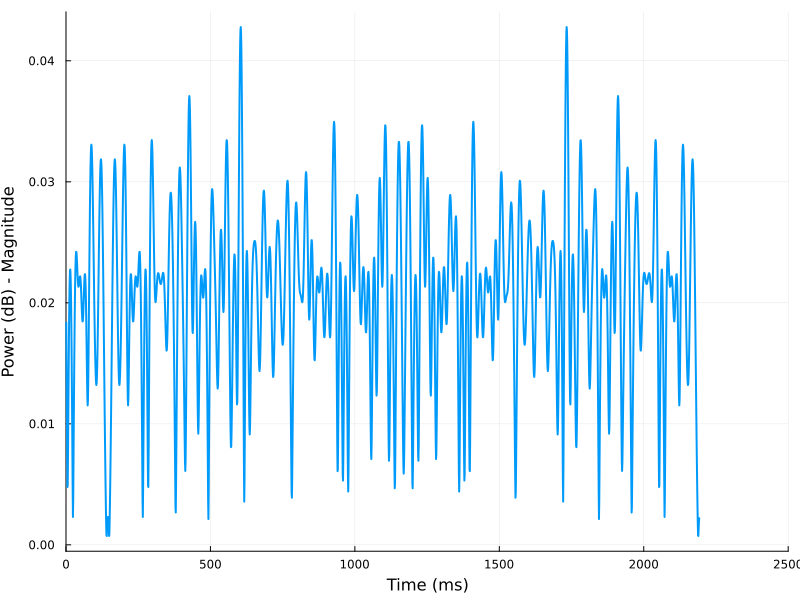

In [9]:
# pss0_t_plot = 
# plot(-20 * log10.(abs2.(xₚₛₛ⁰))
plot(abs.(xₚₛₛ⁰)
    , xlabel="Time (ms)"
    , ylabel="Power (dB) - Magnitude"
    , labels =:false
    , grid = :true
    , xlims = (0,2500)
    , linewidth = 2
    , size = ( 800, 600 )
)
# savefig(pss0_t_plot,"images/pss0_t_plot.png");

##### $\color{Salmon}2.$ Plot the power spectrum of the PSS signal on a dB-scale (using the MATLAB FFT). Estimate the bandwidth as closely as possible (in terms of physical frequencies). What do you observe about the PSS signal?

𝑓ₜ = 0.01


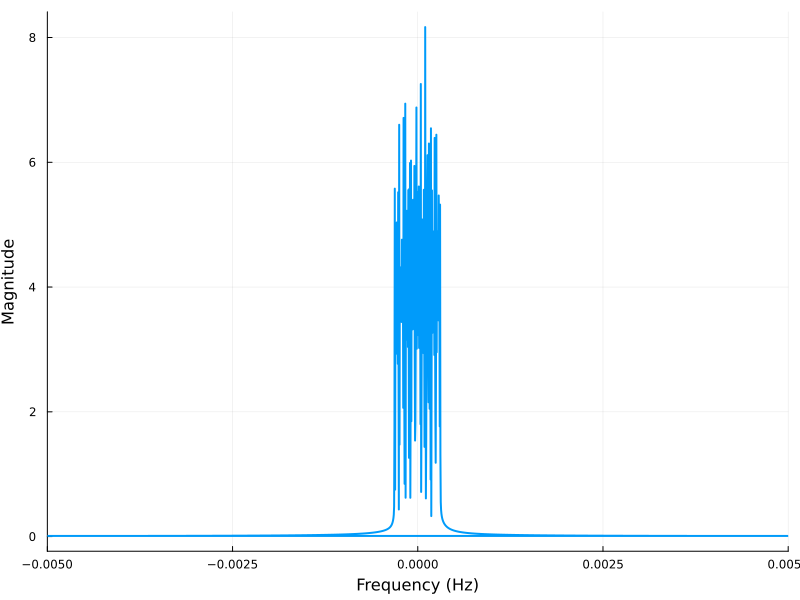

In [10]:
# Compute the frequencies corresponding to the FFT result
𝑓ₜ = 1e-2; @show 𝑓ₜ # Assuming a normalized frequency range
frequencies = fftshift((0:𝑁ₚₛₛ-1) .- 𝑁ₚₛₛ/2) / 𝑁ₚₛₛ * 𝑓ₜ

𝑆̃ₚₛₛ⁰ = fft(xₚₛₛ⁰) # Compute the Fourier transform of the signal

# Plot the magnitude spectrum
plot(frequencies
    , abs.(𝑆̃ₚₛₛ⁰) # In absolute values
    , xlabel="Frequency (Hz)"
    , ylabel="Magnitude"
    , xlims = (-𝑓ₜ/2, 𝑓ₜ/2) # Set limits to focus on the main lobe
    , legend=false
    , linewidth = 2
    , size = ( 800, 600 )
)

##### $\color{Salmon}3.$ Plot the three auto-correlation functions and the three cross-correlation functions. To what extent can we say that these three signals are orthogonal? When using one PSS as a basis function, what is the ratio of signal energy to interference in dB if we assume that these are orthogonal?


In [11]:
using DSP

In [12]:
pss_00 = DSP.xcorr(pss_0,pss_0); plot00 = plot(abs.(pss_00), label="pss_00", title = "Correlate raw data");

In [13]:
include("../data/julia/pss1.jl");

In [14]:
pss_01 = DSP.xcorr(pss_0,pss_1); plot01 = plot(abs.(pss_01), label="pss_01");

In [15]:
include("../data/julia/pss2.jl");

In [16]:
pss_02 = DSP.xcorr(pss_0,pss_2); plot02 = plot(abs.(pss_02), label="pss_02");

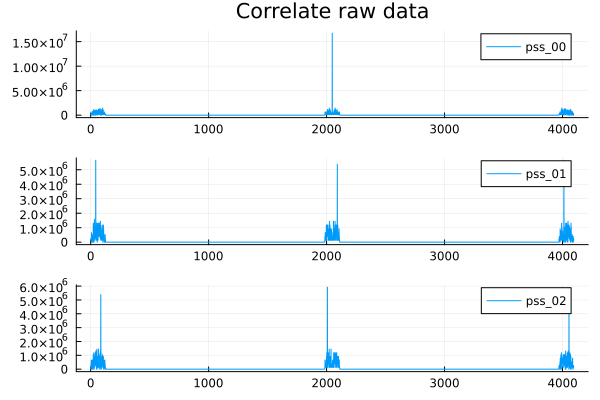

In [17]:
# Arrange subplots in a grid
plot(plot00
    , plot01
    , plot02    
    , layout=(3, 1)
    , legend = :topright
)

In [18]:
# pss00 = xcorr(pss0_t,pss0_t); plot(abs(pss00))
PSS₀₀ = DSP.xcorr(xₚₛₛ⁰,xₚₛₛ⁰); plot_pss00 = plot(abs.(PSS₀₀), label="PSS₀₀", lw = 2, title = "Correlate time-domain signals");

In [19]:
## convert the pss_1 signal in time domain
xₚₛₛ¹ = pss_1; @show xₚₛₛ¹[end] # File Handle
xₚₛₛ¹ ./= norm(xₚₛₛ¹); # Normalize the arrays
xₚₛₛ¹ = xₚₛₛ¹[(end-143):end] ⧺ xₚₛₛ¹ ; @show size(xₚₛₛ¹); # end is 2048 in this case, concat math 

xₚₛₛ¹[end] = -363.0 + 0.0im
size(xₚₛₛ¹) = (2192,)


In [20]:
# pss01 = xcorr(pss0_t,pss1_t); plot(10*log10(abs(pss01)))
PSS₀₁ = DSP.xcorr(xₚₛₛ⁰,xₚₛₛ¹); plot_pss01 = plot(10 * log10.(abs.(PSS₀₁)), label="PSS₀₁");

In [21]:
## convert the pss_2 signal in time domain
xₚₛₛ² = pss_2; @show xₚₛₛ²[end] # File Handle
xₚₛₛ² = Fᴵ(xₚₛₛ²); # (inverse fourier transform) in time domain
xₚₛₛ² ./= norm(xₚₛₛ²); # Normalize the arrays
xₚₛₛ² = xₚₛₛ²[(end-143):end] ⧺ xₚₛₛ² ; @show size(xₚₛₛ²); # end is 2048 in this case, concat math 

xₚₛₛ²[end] = 362 + 0im
size(xₚₛₛ²) = (2192,)


In [22]:
# pss02 = xcorr(pss0_t,pss2_t); plot(10*log10(abs(pss02)))
PSS₀₂ = DSP.xcorr(xₚₛₛ⁰,xₚₛₛ²); plot_pss02 = plot(10 * log10.(abs.(PSS₀₂)), label="PSS₀₂");

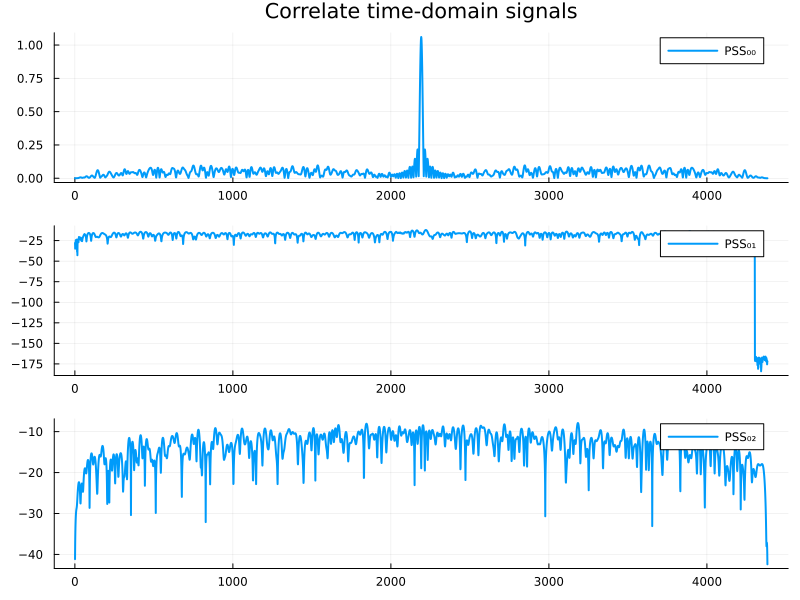

In [23]:
# Arrange subplots in a grid
plot(plot_pss00
    , plot_pss01
    , plot_pss02
    , layout=(3, 1)
    , legend = :topright
    , linewidth = 2 
    , size = ( 800, 600 )
)

In [24]:
# pss11 = xcorr(pss1_t,pss1_t); plot(abs(pss11))
PSS₁₁ = DSP.xcorr(xₚₛₛ¹,xₚₛₛ¹); plot_pss11 = plot(abs.(PSS₁₁), label="PSS₁₁", title = "Correlate time-domain signals");

In [25]:
# pss12 = xcorr(pss1_t,pss2_t); plot(10*log10(abs(pss12)))
PSS₁₂ = DSP.xcorr(xₚₛₛ¹,xₚₛₛ²); plot_pss12 = plot(10 * log10.(abs.(PSS₁₂)), label="PSS₁₂");

In [26]:
# pss22 = xcorr(pss2_t,pss2_t); plot(abs(pss22))
PSS₂₂ = DSP.xcorr(xₚₛₛ²,xₚₛₛ²); plot_pss22 = plot(abs.(PSS₂₂), label="PSS₂₂");

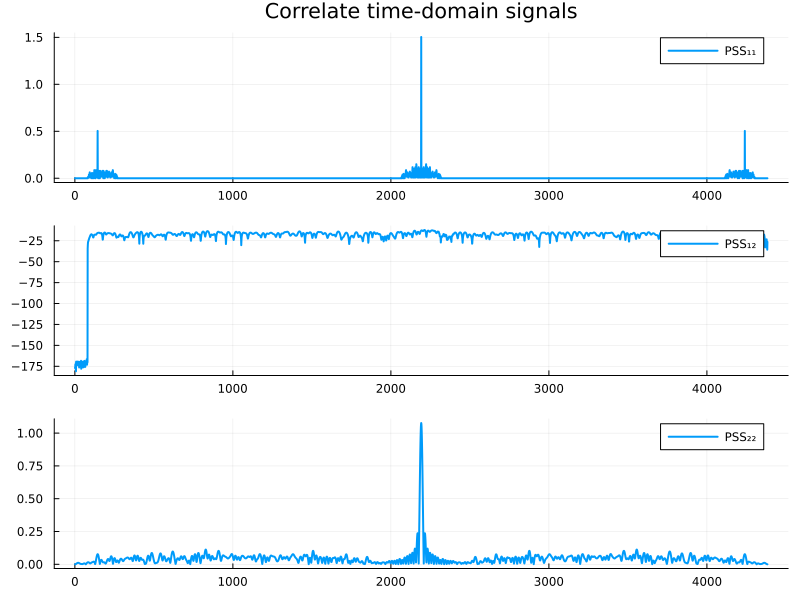

In [27]:
# Arrange subplots in a grid
plot(plot_pss11
    , plot_pss12
    , plot_pss22
    , layout=(3, 1)
    , legend = :topright
    , linewidth = 2 
    , size = ( 800, 600 )
)

### ${\color{Salmon}1.2}$ Channel Model

The received signal is assumed to be of the form
$$y(n) = e^{2 \pi j \Delta f n}\tilde{S}_{PSS,i}(n) ∗ h(n) + z(n)$$
where $h(n)$ is assumed to have a finite-impulse channel which is unknown to the receiver, $z(n)$ is complex circularly-symmetric and additive white Gaussian noise, and $\Delta f$ is an unknown frequency-offset. We can assume that the channel is of the form

$$h(n)= \sum_{l=−⌈L/2⌉+1}^{⌊L/2⌋} a_l \delta(n −Nf −l)$$

for some even number $L$. The $a_l$ are complex amplitudes _unknown to the receiver_ and $Nf$ is a presentation of the unknown timing offset between the transmitter and receiver.

#### ${\color{Salmon}1.2.1}$ Questions

${\color{Salmon}1.}$ You have been provided several signal snapshots with different channel realizations as MATLAB signals

&#x1F4D1; Note: the `Julia` files translating the `MATLAB` files are located under the `../data/julia` directory. The `Julia` files are just reading the `MATLAB`'s files by using the `MAT` Julia Library. 

Below a Julia source code example opening the `.mat` MATLAB original file and reading the `rxs0` and `rsx` signals.

```julia
using MAT

ff = matopen("../matlab/rxsignal_justnoise.mat");

@read ff rxs0;
@read ff rxs1;
```

The original `MATLAB` data files are located under the `../data/matlab` folder and have `NOT` been modified nor altered. 

${\color{Salmon}2.}$ Plot the time and frequency representations of the signals on a dB scale. What do you see?

${\color{Salmon}3.}$  Estimate the bandwidth of the received signal? What are the signal components that are located outside the band of interest?

${\color{Salmon}4.}$ In your opinion what contributes to the ”changing shape” of the main signal component?

### ${\color{Salmon}1.3}$  Receiver

The primary objective is to determine the most likely $i$, or index of the transmitted PSS. In addition we would like to have the best estimate of $N\mathcal{f}$ and $\Delta \mathcal{f}$ since these are required to detect the other signal components after the PSS (Lab session 2). This will be investigated in other lab sessions. There are different approaches to doing this, but here we will take the approach where Nf and ∆f are discretized and are detected in a similar fashion to $i$. Let us assume that $N\mathcal{f}$ is discretized to the resolution of one sample. Since the periodicity of the PSS is $N$ samples, $N\mathcal{f}$ can assume the values ${0, 1, · · · , N − 1}$. Although a purely continuous random variable, we will also discretize $\Delta \mathcal{f}$ as $\Delta \mathcal{f} = m \Delta \mathcal{f}_{min}, m = − \Delta \mathcal{f}_{max}/\Delta \mathcal{f}_{min}, · · · , \Delta \mathcal{f}_{max}/\Delta \mathcal{f}_{min}$, where $\Delta \mathcal{f}_{max}$ is the largest frequency-offset we are likely to encounter. Under these assumptions we will consider the following detection rule for the triple $(i, N\mathcal{f} , m)$

$$(\hat{i},\hat{N}\mathcal{f},\hat{m}) = argmax \; Y(i, N\mathcal{f} , m)$$

where $Y (i, N\mathcal{f} , m)$ will be chosent as the following statistic:

$$Y (i, N\mathcal{f} , m) = \left| \sum_{n=0}^{N_{PSS - 1}}e^{- 2 \pi j n m \Delta \mathcal{f}_{min} / \mathcal{f}_s}x_i^* (n)y(n + Nf ) \right|^2 $$


#### ${\color{Salmon}1.3.1}$ Questions

$\color{Salmon}1.$ How is the above statistic related to the maximum-likelihood detector we considered in class? What is the reason for the difference? Think about the simpler receiver where $L = 1$, $N\mathcal{f} = 0$ and $\Delta \mathcal{f} = 0$.

In [28]:
## Receive the signal
include("../data/julia/rxsignal_withchannelandfreqoff.jl");

&#x1F4D1; Note: the `Julia` files translating the `MATLAB` files are located under the `../data/julia` directory. The `Julia` files are just reading the `MATLAB`'s files by using the `MAT` Julia Library. 

Below a Julia source code example opening the `.mat` MATLAB original file and reading the `rxs3` signal.

```julia
using MAT

ff = matopen("../data/matlab/rxsignal_withchannelandfreqoff.mat");

@read ff rxs3;
```

The original `MATLAB` data files are located under the `../data/matlab` folder and have `NOT` been modified nor altered. 

In [29]:
## Load the template signal
include("../data/julia/pss2.jl");

In [30]:
using FFTW

In [31]:
## Assign the received signal a variable sᵣₓ³
sₚₛₛ³ = rxs3; # RX Received Signal 3 File Handle
@show size(sₚₛₛ³), typeof(sₚₛₛ³);

(size(sₚₛₛ³), typeof(sₚₛₛ³)) = ((616447, 1), Matrix{ComplexF64})


In [32]:
using LinearAlgebra

In [33]:
## Assign the template signal a variable hₚₛₛ²
## convert the signal in time domain
pₚₛₛ² = pss_2; # File Handle
hₚₛₛ² = Fᴵ(pₚₛₛ²); # (inverse fourier transform) in time domain
hₚₛₛ² ./= norm(hₚₛₛ²);
hₚₛₛ² = hₚₛₛ²[(end-143):end] ⧺ hₚₛₛ²
@show size(hₚₛₛ²), typeof(hₚₛₛ²); # end is 2048 in this case, concat math 

(size(hₚₛₛ²), typeof(hₚₛₛ²)) = ((2192,), Vector{ComplexF64})


In [34]:
## Prepare the template signal for convolution
h̃ₚₛₛ² = ⦰(hₚₛₛ²); # reverse #typed H\overbar
h̃ₚₛₛ²ᴴ = conj(h̃ₚₛₛ²); # conjugate 
@show length(h̃ₚₛₛ²ᴴ), typeof(h̃ₚₛₛ²);

(length(h̃ₚₛₛ²ᴴ), typeof(h̃ₚₛₛ²)) = (2192, Vector{ComplexF64})


In [35]:
## Perform the convolution between the 2 signals
rₚₛₛ² = 10 * log10.(abs.( sₚₛₛ³ ⊗ h̃ₚₛₛ²ᴴ ))
@show size( rₚₛₛ² ), typeof(h̃ₚₛₛ²);  #typed \itH\hat

(size(rₚₛₛ²), typeof(h̃ₚₛₛ²)) = ((618638, 1), Vector{ComplexF64})


In [36]:
# Find maximum value and its index
Ĉᵩ², 𝑁̂𝑓² = argmax(rₚₛₛ²)
@show Ĉᵩ², 𝑁̂𝑓²;

(Ĉᵩ², 𝑁̂𝑓²) = (50.649042476081405, CartesianIndex(6628, 1))


In [37]:
# Plot the result
m2_chan_plot = 
plot(rₚₛₛ², xlabel="Sample", ylabel="Power (dB)", title="Convolution Result", ylim=(-20, 60), size = (800,600))
savefig(m2_chan_plot,"images/m2_chan_plot.png");

<img src=images/m2_chan_plot.png width='' heigth='' > </img>

In [88]:
########################################################
# Frequency Offset Estimator Function
########################################################
function freq_offset_est(sₚₛₛ, hₚₛₛ, Nf, m, 𝑓ₛ)

    # Frequency offset estimator
    Y = zeros(Float64, length(m));
    L = length(hₚₛₛ)
    t = 0:(1/𝑓ₛ):((L-1)/𝑓ₛ)

    for i = 1:length(m)
        # vec() denote the operation of reshaping sequence into a one-dimensional vector
        # in Matlab it is the .' (per element transpose)
        Y[i] = Y[i] + abs2.(∑(exp.(-2*pi*j*m[i].*t) .* conj(hₚₛₛ) .* vec(sₚₛₛ[Nf:(Nf + L -1)])));
    end

    return A_fo, fo = argmax(Y)
end

freq_offset_est (generic function with 1 method)

In [89]:
𝑓ₛ = 61.44e6 # Msamples/s.

Δ𝑓 = 10.0
𝑓₋ = -7500. # f_min
𝑓₊ =  7500. # f_max
m = 𝑓₋:Δ𝑓:𝑓₊

θ₁ = 144 # Cyclic Prefix
θ₂ = 2048 # FFT Size

2048

In [90]:
N𝑓 = getindex(𝑁̂𝑓², 1) - length(hₚₛₛ²) + 1
@show N𝑓, getindex(𝑁̂𝑓², 1) , length(rₚₛₛ²), length(m);

(N𝑓, getindex(𝑁̂𝑓², 1), length(rₚₛₛ²), length(m)) = (4437, 6628, 618638, 1501)


In [91]:
# Grab the function Profs Frequency Offset with his values
A𝑓ₒ, 𝑓ₒ = freq_offset_est(sₚₛₛ³, hₚₛₛ², N𝑓, m, 𝑓ₛ);

In [101]:
frequency_offset = m[𝑓ₒ]

340.0

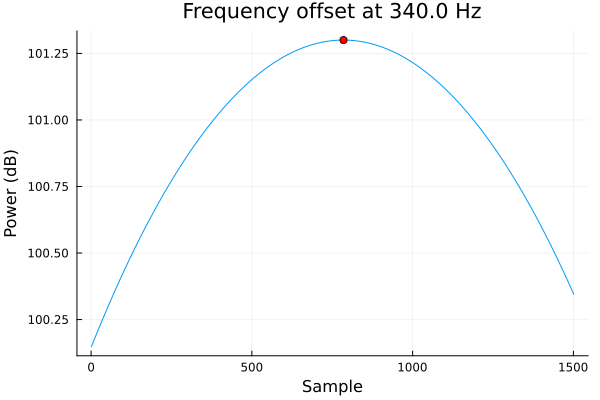

In [110]:
cfo_estim_plot = 
plot(10 * log10.(abs.(Y))
    , xlabel="Sample"
    , ylabel="Power (dB)"
    , title="Frequency offset at $frequency_offset Hz"
)
scatter!((𝑓ₒ, (10 * log10(A𝑓ₒ))), color="red", label=:none, legend=:none)

## ${\color{Salmon}2}$  MATLAB Files

The supplied MATLAB/OCTAVE files are
1. pss.m - generates the three PSS signals for fs bandwidth
2. TP1 top.m - skeleton of your exercise that should be completed

In [111]:
s = read("../data/usrp_samples.dat");
s2 = s[1:2:end] + im * s[2:2:end];

In [112]:
Y_size = 153600
f = range(-7.68e6, stop=7.68e6, length=Y_size); @show size(f), size(s2)
Y = 20 * log10.(abs.(fftshift(fft(s2[1:Y_size]))));

(size(f), size(s2)) = ((153600,), (307200,))


In [113]:
# Plot an approximation to the power spectrum
usrp_samples = 
plot(f, Y
    ,labels = :false
    , grid = :true
    , title = "Periodogram Using FFT"
    , xlabel = "Frequency (Hz)"
    , ylabel = "Power/Frequency (dB/Hz)"
    , xlims = (-7.68e6, 7.68e6)
    , ylims = (30, 150)
    , linewidth = 2
    , size = ( 800, 600 )
)

savefig(usrp_samples,"images/usrp_samples.png");

<img src=images/usrp_samples.png width='' height='' > </img>

# &#x1F4DA; References

In signal processing, `fftshift` is an operation that shifts the zero frequency component (DC component) of the Fourier transform to the center of the spectrum. It is commonly used to visualize the spectrum in a more intuitive way.

In the provided code snippet `fftshift(fft(s2))`, it means:

- `fft(s2)`: This calculates the discrete Fourier transform (DFT) of the signal `s2`.
- `fftshift(...)`: This shifts the zero frequency component to the center of the spectrum.

In simpler terms, it rearranges the output of the Fourier transform so that low frequencies are in the center of the plot, making it easier to interpret the spectrum, especially in the context of symmetric signals.

The `20 * log10(abs(...))` part is used to convert the amplitude spectrum to decibels, which is a common practice in signal processing to represent the dynamic range of the spectrum in a more human-readable way.

"DC" stands for "Direct Current" in the context of electronics and signal processing. In the time-domain analysis of signals, DC refers to a constant voltage or current that does not vary with time. It represents the zero-frequency or constant component of a signal.

In the context of a signal's frequency spectrum, the term "DC component" specifically refers to the component at zero frequency. In mathematical terms, it corresponds to the average value or the coefficient of the constant term in the Fourier series or Fourier transform of a signal.

In summary, "DC" is associated with the constant part of a signal, and in the frequency domain, it refers to the zero-frequency component.